## Introduction
This is the data taken from the application layer of the system. Through the network analysis the lables are assigned having three classes. 1) Benign: Legit ,2) DoS slowloris:DoS attack and 3). DoS Hulk: DDoS attack. 

## Exploratory Analysis : Data Visualization
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [4]:
from mpl_toolkits.mplot3d import Axes3D #For Basic ploting
from sklearn.preprocessing import StandardScaler #Preprocessing
from sklearn import preprocessing    # Preprocessing
from sklearn.naive_bayes import GaussianNB #import gaussian naive bayes model
from sklearn.tree import DecisionTreeClassifier #import Decision tree classifier
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

The next hidden code cells define functions for plotting data.

In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Now you're ready to read in the data and use the plotting functions to visualize the data.

> Training Data:

In [10]:
nRowsRead = None
train_data = pd.read_csv('./data/train.csv', delimiter=',', nrows = nRowsRead)
train_data.dataframeName = 'train.csv'
nRow, nCol = train_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 809361 rows and 78 columns


<ipython-input-5-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


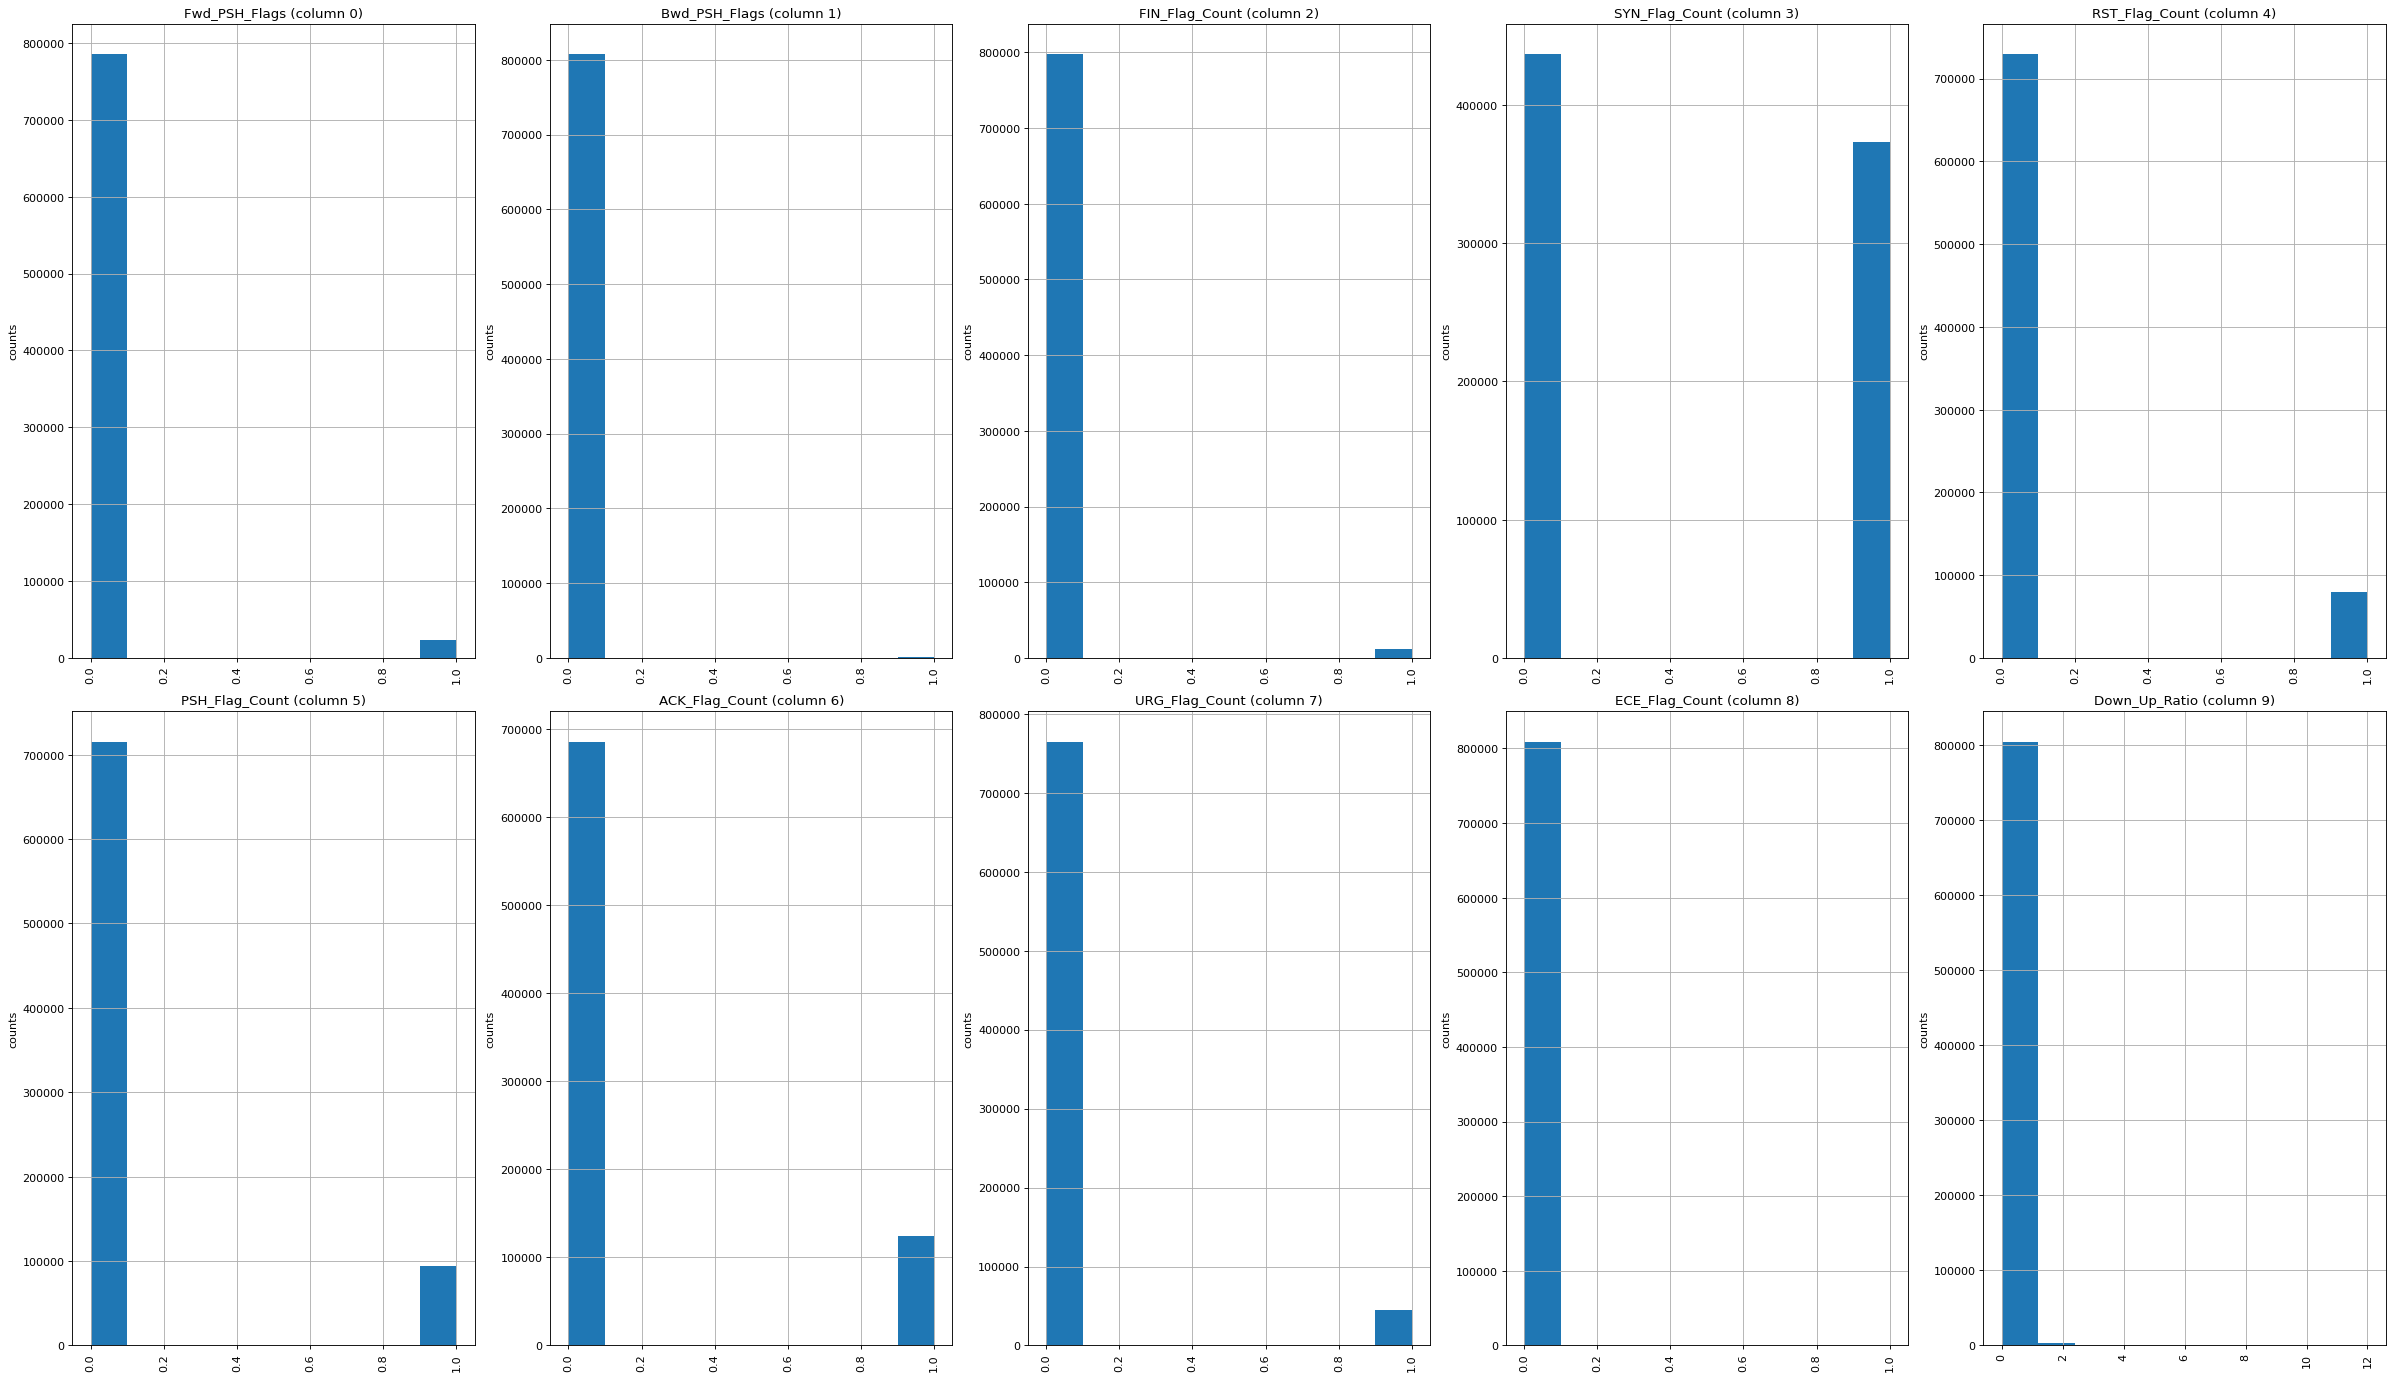

In [21]:
plotPerColumnDistribution(train_data, 10, 5)

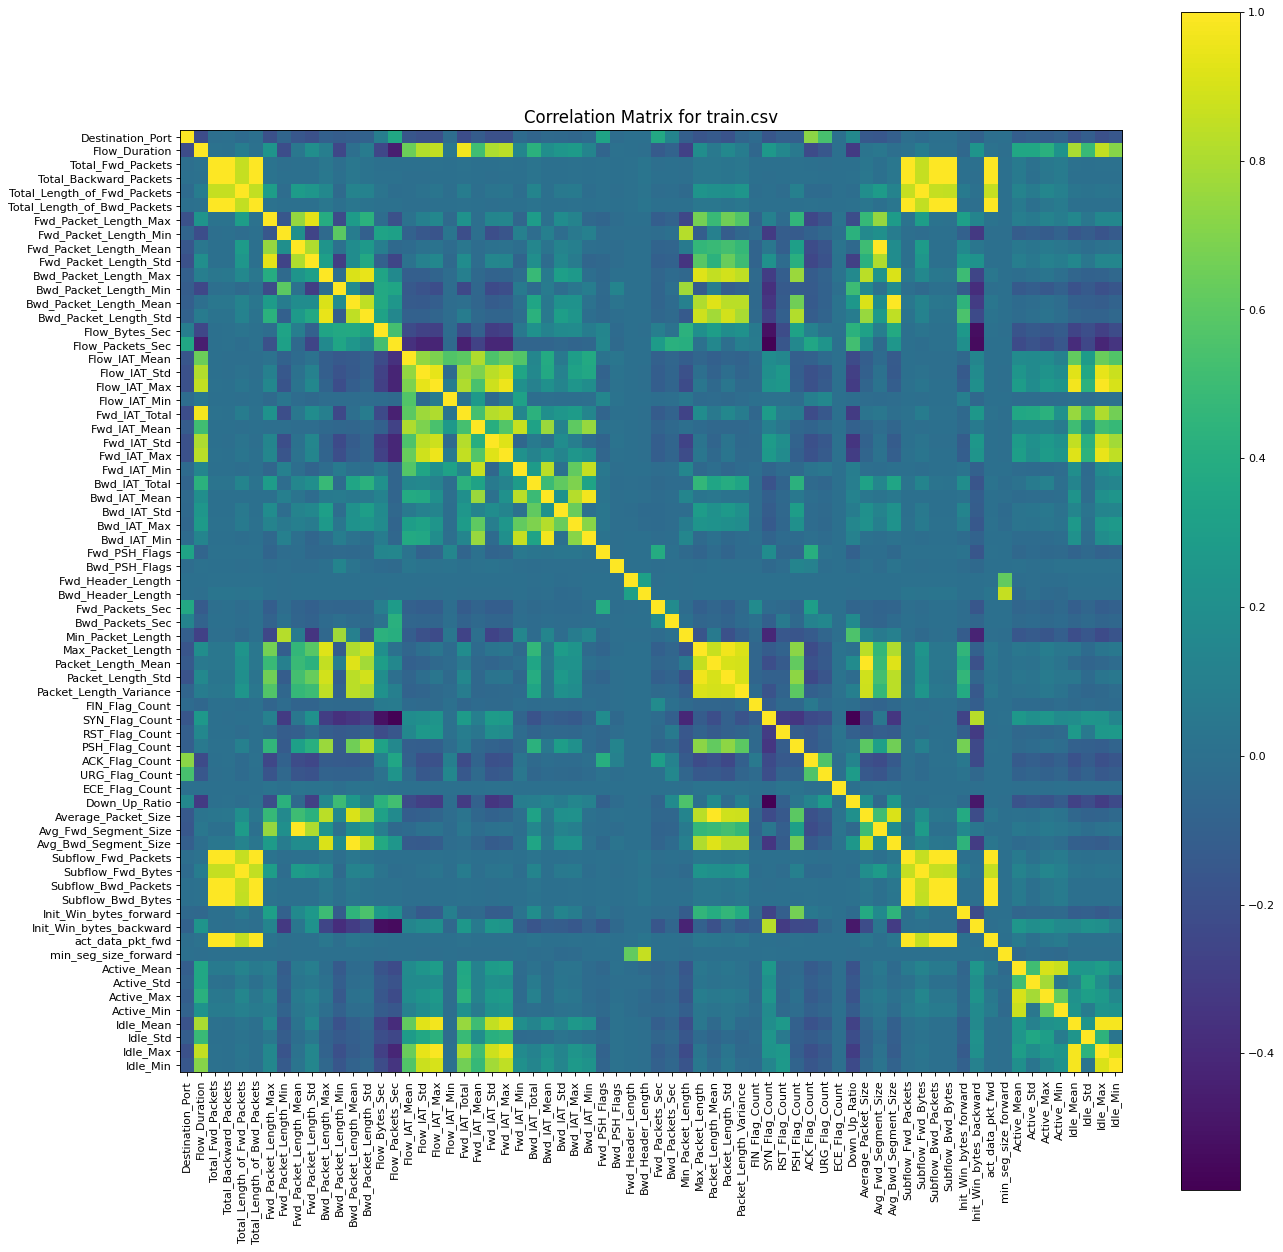

In [22]:
plotCorrelationMatrix(train_data, 19)

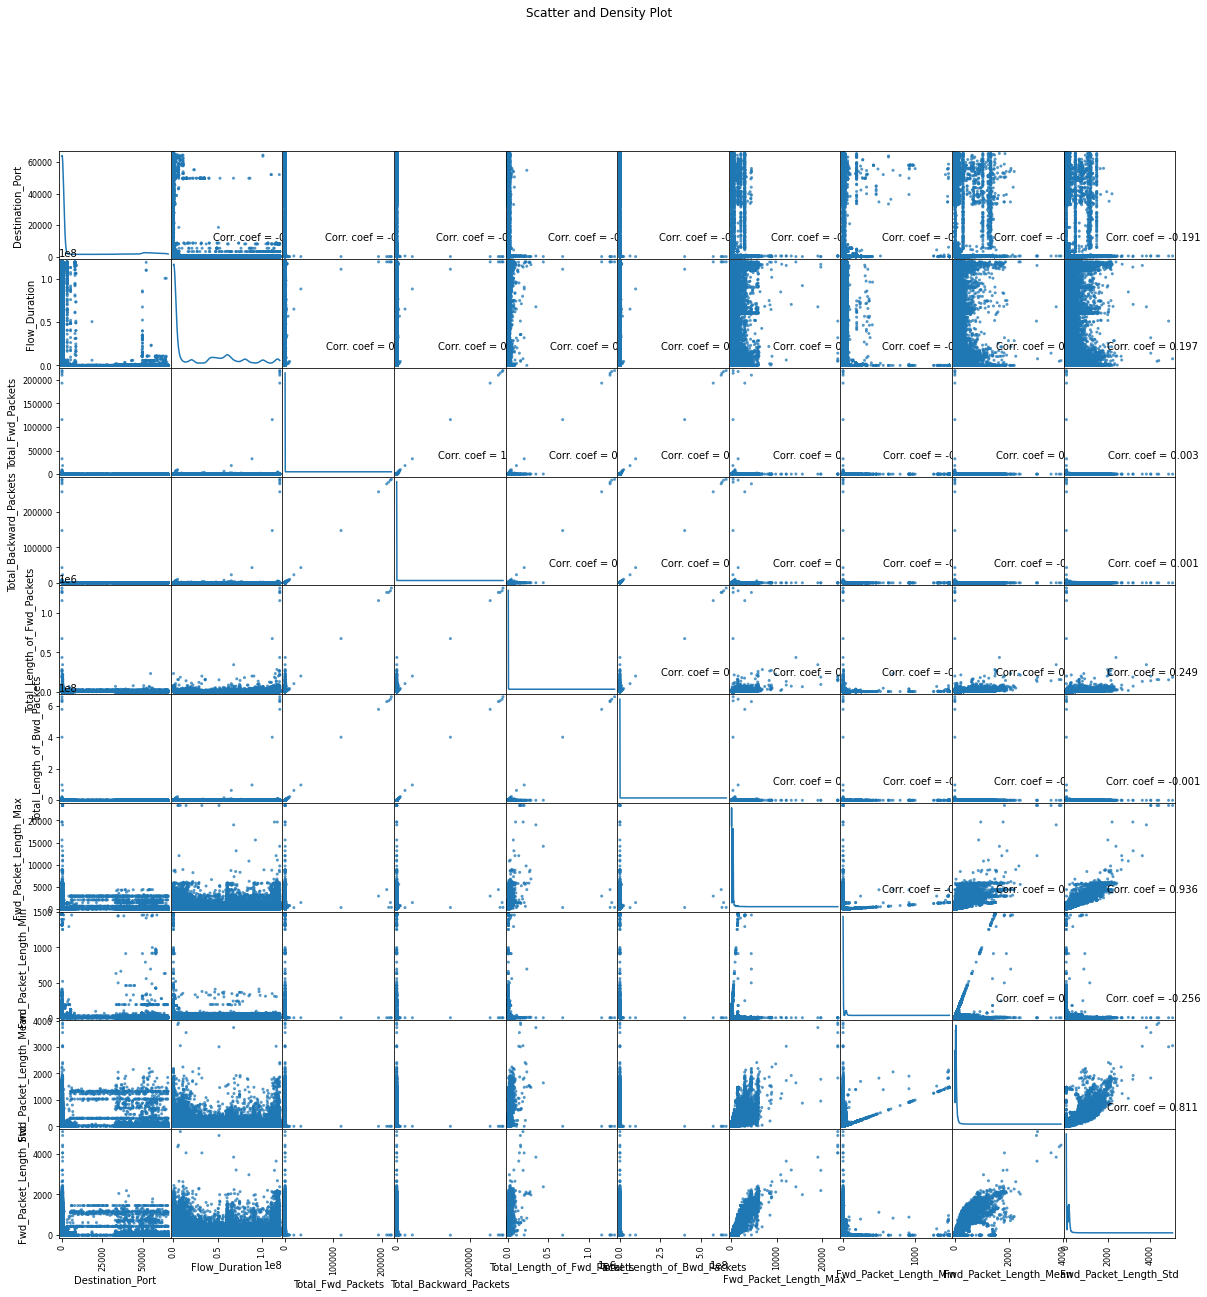

In [23]:
plotScatterMatrix(train_data, 20, 10)

> Testing Data:

In [11]:
nRowsRead = None
test_data = pd.read_csv('./data/test.csv', delimiter=',', nrows = nRowsRead)
test_data.dataframeName = 'test.csv'
nRow, nCol = test_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 346869 rows and 78 columns


Split the dataset into train and test. As convention in machine learning, X_train,X_test are used for features and y_train,y_test are used for classes. As our data is already in the form of two files. train_data and test data. We will split it in this way:

In [14]:
X_train = train_data.drop('Label',axis=1)
X_test = test_data.drop('Label',axis=1)
y_train = train_data['Label']
y_test = test_data['Label']

Now, we ll implement two algorithms Naive Bayes and Decision Tree. Then at the end we ll comapre the result's from all of these algorithms.

> **Naive Bayes**

In [16]:
# create gaussian naive bayes classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train,y_train)
#Predict the response for test dataset
gnb_pred = gnb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))

Accuracy :  0.9481879326200958


> **Decision Tree**

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
dt_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

Accuracy: 0.9999452242777532


In [19]:
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, gnb_pred))
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, dt_pred))

Naive Bayes Accuracy: 0.9481879326200958
Decision Tree Accuracy: 0.9999452242777532
